In [4]:
# ================================================
# Create Cal_Estimation_Project Folder Structure
# ================================================

import os

ROOT = "/content/drive/MyDrive/Cal_Estimation_Project"

folders = [
    f"{ROOT}",
    f"{ROOT}/data",
    f"{ROOT}/data/raw",
    f"{ROOT}/data/raw/foodseg103",
    f"{ROOT}/data/raw/nutrition5k",
    f"{ROOT}/data/raw/usda",
    f"{ROOT}/data/processed",
    f"{ROOT}/checkpoints",
    f"{ROOT}/outputs",
    f"{ROOT}/cache",
    f"{ROOT}/logs",
    f"{ROOT}/notebooks"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("✔️ Project structure created successfully at:")
print(ROOT)


✔️ Project structure created successfully at:
/content/drive/MyDrive/Cal_Estimation_Project


In [5]:
# Mount Google Drive, upload Kaggle API key, and install Kaggle CLI for dataset access
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

!pip install -q kaggle
!kaggle --version
%cd /content


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle.json to kaggle.json
Kaggle API 1.7.4.5
/content


In [6]:
# ============================================================
# CACHE UTILITIES (NEW CELL ADDED FOR NEW PROJECT STRUCTURE)
# Saves lightweight information needed for future notebooks.
# ============================================================

import pickle
import os

CACHE_DIR = "/content/drive/MyDrive/Cal_Estimation_Project/cache"
os.makedirs(CACHE_DIR, exist_ok=True)

def save_cache(obj, name="01_cache"):
    path = f"{CACHE_DIR}/{name}.pkl"
    with open(path, "wb") as f:
        pickle.dump(obj, f)
    print(f"✔ Saved cache → {path}")

def load_cache(name="01_cache"):
    path = f"{CACHE_DIR}/{name}.pkl"
    if os.path.exists(path):
        print(f"✔ Loaded cache → {path}")
        with open(path, "rb") as f:
            return pickle.load(f)
    return None


In [7]:
# Define Kaggle dataset identifiers and create base folder to store raw datasets
from pathlib import Path

BASE_DIR = Path("/content/drive/MyDrive/Cal_Estimation_Project/data/raw")
kaggle_datasets = {
    "foodseg103": "ggrill/foodseg103",
    "nutrition5k": "siddhantrout/nutrition5k-dataset"
}

BASE_DIR.mkdir(parents=True, exist_ok=True)
print("Data root directory:", BASE_DIR)


Data root directory: /content/drive/MyDrive/Cal_Estimation_Project/data/raw


In [8]:
# Move uploaded Kaggle key to the correct directory and set permissions for authentication
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API key configured successfully.")


Kaggle API key configured successfully.


In [9]:
import os
import zipfile
from pathlib import Path

BASE_DIR = Path("/content/drive/MyDrive/Cal_Estimation_Project/data/raw")
BASE_DIR.mkdir(parents=True, exist_ok=True)

kaggle_datasets = {
    "foodseg103": "ggrill/foodseg103",
    "nutrition5k": "siddhantrout/nutrition5k-dataset",
    "nutrition5k_side": "zygmuntyt/nutrition5k-dataset-side-angle-images"
}

def expected_ok(name: str, dest: Path) -> bool:
    if name == "foodseg103":
        return (dest / "FoodSeg103" / "Images" / "img_dir" / "train").exists()

    if name == "nutrition5k":
        return (dest / "dish_images.pkl").exists() and (dest / "dishes.xlsx").exists()

    if name == "nutrition5k_side":
        return any("side" in d.name.lower() for d in dest.iterdir() if d.is_dir())

    return False

def extract_all(dest: Path):
    for z in dest.glob("*.zip"):
        with zipfile.ZipFile(z, "r") as zip_ref:
            zip_ref.extractall(dest)

for name, slug in kaggle_datasets.items():
    dest = BASE_DIR / name
    dest.mkdir(parents=True, exist_ok=True)

    print(f"\nProcessing: {name}")

    # Check if already extracted properly
    if expected_ok(name, dest):
        print(f"{name} already available.")
        continue

    # Check if zip exists
    zip_exists = any(f.suffix == ".zip" for f in dest.iterdir() if f.is_file())

    # Download if needed
    if not zip_exists:
        print(f"Downloading {name}...")
        !kaggle datasets download -d {slug} -p "{dest}"

    # Extract zip files
    print(f"Extracting {name}...")
    extract_all(dest)

    # Validate
    if expected_ok(name, dest):
        print(f"{name} extracted successfully.")
    else:
        print(f"{name} extraction incomplete. Manual review required.")



Processing: foodseg103
Dataset URL: https://www.kaggle.com/datasets/ggrill/foodseg103
License(s): apache-2.0
 99% 1.16G/1.17G [00:10<00:00, 54.6MB/s]
100% 1.17G/1.17G [00:10<00:00, 117MB/s] 
Extracting foodseg103...
foodseg103 extracted successfully.

Processing: nutrition5k
Dataset URL: https://www.kaggle.com/datasets/siddhantrout/nutrition5k-dataset
License(s): CC-BY-SA-4.0
100% 2.29G/2.29G [00:19<00:00, 100MB/s] 
100% 2.29G/2.29G [00:19<00:00, 123MB/s]
Extracting nutrition5k...
nutrition5k extracted successfully.

Processing: nutrition5k_side
Dataset URL: https://www.kaggle.com/datasets/zygmuntyt/nutrition5k-dataset-side-angle-images
License(s): unknown
^C
Extracting nutrition5k_side...
nutrition5k_side extraction incomplete. Manual review required.


In [11]:
# ============================================================
# CELL 6 — Show Folder Structure for Quick Inspection
# ============================================================
def show_tree(path: Path, depth=0, max_depth=3):
    if not path.exists():
        print(f"{path} does not exist — skipping.")
        return
    if depth > max_depth:
        return
    prefix = "    " * depth
    print(f"{prefix}{path.name}/")
    for p in sorted(path.iterdir()):
        if p.is_dir():
            show_tree(p, depth+1, max_depth)
        else:
            print(f"{prefix}    {p.name}")

print("\n===== FoodSeg103 =====")
show_tree(BASE_DIR / "foodseg103")

print("\n===== Nutrition5k Original =====")
show_tree(BASE_DIR / "nutrition5k_orig")   # Now safe — will not crash

print("\n===== Nutrition5k SIDE-ANGLE =====")
show_tree(BASE_DIR / "nutrition5k_side")



===== FoodSeg103 =====
foodseg103/
    FoodSeg103/
        ImageSets/
            test.txt
            train.txt
        Images/
            ann_dir/
            img_dir/
        Readme.txt
        category_id.txt
        test_recipe1m_id.txt
        train_test_recipe1m_id.txt
    foodseg103.zip

===== Nutrition5k Original =====
/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k_orig does not exist — skipping.

===== Nutrition5k SIDE-ANGLE =====
nutrition5k_side/


In [12]:
# Show a clean folder tree. Prints directories recursively and top-level files once.
from pathlib import Path

def show_tree(base_path, max_depth=6, show_top_files=True):
    base = Path(base_path).resolve()
    visited = set()

    def walk(dir_path: Path, depth: int):
        rp = dir_path.resolve()
        if rp in visited or depth > max_depth:
            return
        visited.add(rp)

        indent = ' ' * 4 * depth
        print(f"{indent}{dir_path.name}/")

        if depth == 0 and show_top_files:
            for f in sorted(p.name for p in dir_path.iterdir() if p.is_file()):
                print(f"{indent}    {f}")

        for d in sorted(p for p in dir_path.iterdir() if p.is_dir()):
            walk(d, depth + 1)

    print(f"\nDataset Structure for: {base.name}\n" + "-" * 80)
    walk(base, 0)
    print("-" * 80 + f"\nCompleted structure listing for {base.name}\n")

# Run for both datasets
show_tree(BASE_DIR / "foodseg103")
show_tree(BASE_DIR / "nutrition5k")



Dataset Structure for: foodseg103
--------------------------------------------------------------------------------
foodseg103/
    foodseg103.zip
    FoodSeg103/
        ImageSets/
        Images/
            ann_dir/
                test/
                train/
            img_dir/
                test/
                train/
--------------------------------------------------------------------------------
Completed structure listing for foodseg103


Dataset Structure for: nutrition5k
--------------------------------------------------------------------------------
nutrition5k/
    dish_images.pkl
    dish_ingredients.xlsx
    dishes.xlsx
    ingredients.xlsx
    nutrition5k-dataset.zip
--------------------------------------------------------------------------------
Completed structure listing for nutrition5k



In [13]:
# Verify that all required dataset folders and key files exist.
from pathlib import Path

print("Verifying dataset completeness...\n")

foodseg_path = BASE_DIR / "foodseg103" / "FoodSeg103"
img_train = foodseg_path / "Images" / "img_dir" / "train"
ann_train = foodseg_path / "Images" / "ann_dir" / "train"

if foodseg_path.exists():
    print("FoodSeg103 folder found.")
    print(f"Train images: {len(list(img_train.glob('*.*')))} files")
    print(f"Train annotations: {len(list(ann_train.glob('*.*')))} files")
else:
    print("FoodSeg103 folder missing!")

nutrition_path = BASE_DIR / "nutrition5k"
required_files = ["dish_images.pkl", "dishes.xlsx", "ingredients.xlsx"]

print("\nNutrition5k dataset check:")
if nutrition_path.exists():
    print("Nutrition5k folder found.")
    for f in required_files:
        status = "Available" if (nutrition_path / f).exists() else "Missing"
        print(f"{f}: {status}")
else:
    print("Nutrition5k folder missing!")

print("\nDataset completeness verification finished.")


Verifying dataset completeness...

FoodSeg103 folder found.
Train images: 4983 files
Train annotations: 4983 files

Nutrition5k dataset check:
Nutrition5k folder found.
dish_images.pkl: Available
dishes.xlsx: Available
ingredients.xlsx: Available

Dataset completeness verification finished.


In [14]:
import os, zipfile, pickle
from pathlib import Path

nutrition_dir = BASE_DIR / "nutrition5k"
zip_path = nutrition_dir / "nutrition5k-dataset.zip"
pkl_path = nutrition_dir / "dish_images.pkl"

print(f"Nutrition5k folder: {nutrition_dir.exists()}")
print(f"ZIP size: {zip_path.stat().st_size/1e6:.2f} MB" if zip_path.exists() else "ZIP missing")

if pkl_path.exists():
    bk = nutrition_dir / "dish_images_old.pkl"
    pkl_path.rename(bk)
    print(f"Backed up old PKL to {bk}")

extract_dir = nutrition_dir / "nutrition5k-dataset"
if extract_dir.exists():
    print("Existing extract folder found — skipping re-extract.")
else:
    print("Extracting Nutrition5k ZIP — this may take 2-3 minutes …")
    with zipfile.ZipFile(zip_path, "r") as zf:
        zf.extractall(nutrition_dir)
    print("Extraction complete.")

inner_pkl = None
for root, _, files in os.walk(extract_dir):
    for f in files:
        if f == "dish_images.pkl":
            inner_pkl = Path(root) / f
            break

if inner_pkl and inner_pkl.exists():
    print("Found inner PKL:", inner_pkl)
    with open(inner_pkl, "rb") as f:
        dish_images = pickle.load(f)
    import shutil
    shutil.copy(inner_pkl, pkl_path)
    print(f"Restored dish_images.pkl with depth images to {pkl_path}")
else:
    print("Could not find inner dish_images.pkl after extraction — manual inspection needed.")


Nutrition5k folder: True
ZIP size: 2462.23 MB
Backed up old PKL to /content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k/dish_images_old.pkl
Extracting Nutrition5k ZIP — this may take 2-3 minutes …
Extraction complete.
Could not find inner dish_images.pkl after extraction — manual inspection needed.


In [15]:
import zipfile, os
from pathlib import Path

zip_path = Path("/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k/nutrition5k-dataset.zip")

with zipfile.ZipFile(zip_path, "r") as z:
    print("Total files in ZIP:", len(z.namelist()))
    print("First 30 entries:")
    for n in z.namelist()[:30]:
        print("  ", n)


Total files in ZIP: 4
First 30 entries:
   dish_images.pkl
   dish_ingredients.xlsx
   dishes.xlsx
   ingredients.xlsx


In [16]:
import pickle
import pandas as pd
from pathlib import Path

pkl_path = Path("/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k/dish_images.pkl")

with open(pkl_path, "rb") as f:
    data = pickle.load(f)

print("Type:", type(data))
if isinstance(data, pd.DataFrame):
    print("Columns:", list(data.columns))
elif isinstance(data, list):
    print("List length:", len(data), "| sample type:", type(data[0]))
elif isinstance(data, dict):
    print("Keys:", list(data.keys())[:5])


Type: <class 'pandas.core.frame.DataFrame'>
Columns: ['dish', 'rgb_image', 'depth_image']


In [17]:
# Preview Nutrition5k metadata from dishes.xlsx.
import pandas as pd

meta_file = BASE_DIR / "nutrition5k" / "dishes.xlsx"

if meta_file.exists():
    df_meta = pd.read_excel(meta_file)
    print(f"Loaded Nutrition5k metadata: {df_meta.shape[0]} records")
    print("Columns:", list(df_meta.columns))
    display(df_meta.head())
else:
    print("dishes.xlsx not found in Nutrition5k folder.")


Loaded Nutrition5k metadata: 5006 records
Columns: ['dish_id', 'total_mass', 'total_calories', 'total_fat', 'total_carb', 'total_protein']


,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103,0.148000,4.625000,0.956000


In [19]:
# Ensure dish_images.pkl exists and load it safely
from pathlib import Path
import pickle

pkl_path = Path("/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k/dish_images.pkl")

if pkl_path.exists():
    print("Loading dish_images.pkl ...")
    with open(pkl_path, "rb") as f:
        dish_images = pickle.load(f)
    print("Loaded successfully:", type(dish_images))
else:
    raise FileNotFoundError(f"dish_images.pkl NOT found at {pkl_path}")


Loading dish_images.pkl ...
Loaded successfully: <class 'pandas.core.frame.DataFrame'>


dish_images type: <class 'pandas.core.frame.DataFrame'>


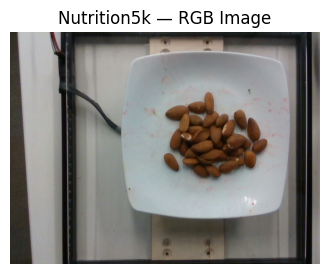

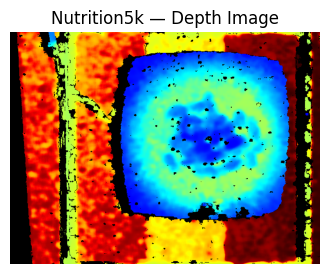

In [20]:
#  Correct Nutrition5k visualization — handles PNG bytes safely
import pickle, io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("dish_images type:", type(dish_images))

if isinstance(dish_images, list):
    print(f"List detected with {len(dish_images)} entries")
    sample = dish_images[0]
    if isinstance(sample, dict) and "rgb_image" in sample:
        row0 = sample
    else:
        raise ValueError("Unexpected list structure — first item has no 'rgb_image'.")
elif hasattr(dish_images, "iloc"):
    row0 = dish_images.iloc[0]
else:
    raise TypeError("Unsupported data type for dish_images:", type(dish_images))

if "rgb_image" in row0:
    rgb_bytes = row0["rgb_image"]
    if isinstance(rgb_bytes, (bytes, bytearray)):
        rgb_image = Image.open(io.BytesIO(rgb_bytes))
    else:
        rgb_image = Image.fromarray(np.uint8(rgb_bytes))
    plt.figure(figsize=(4,4))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("Nutrition5k — RGB Image")
    plt.show()

if "depth_image" in row0:
    depth_bytes = row0["depth_image"]
    if isinstance(depth_bytes, (bytes, bytearray)):
        depth_image = Image.open(io.BytesIO(depth_bytes))
        plt.figure(figsize=(4,4))
        plt.imshow(depth_image, cmap="gray")
        plt.axis("off")
        plt.title("Nutrition5k — Depth Image")
        plt.show()


Dish ID: dish_1559243887


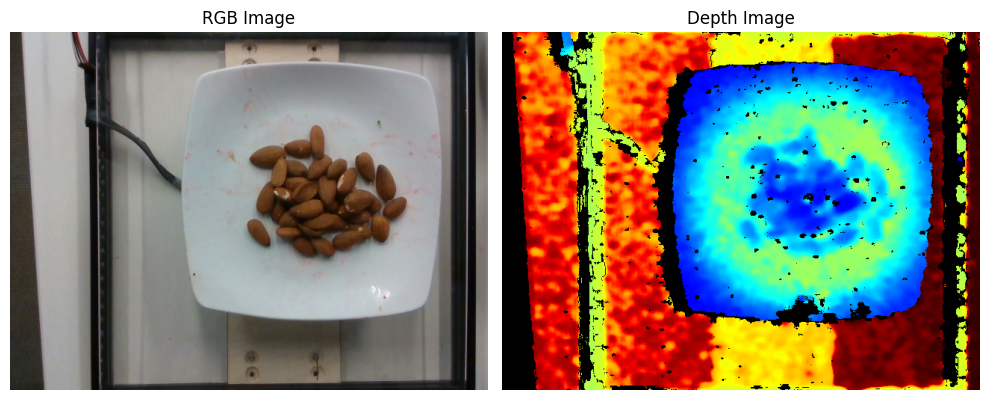

In [21]:
# Decode and visualize one RGB and depth image from Nutrition5k
from PIL import Image
import io

sample_row = dish_images.iloc[0]
print("Dish ID:", sample_row["dish"])

rgb_bytes = sample_row["rgb_image"]
rgb_image = Image.open(io.BytesIO(rgb_bytes))

depth_bytes = sample_row["depth_image"]
depth_image = Image.open(io.BytesIO(depth_bytes))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap="gray")
plt.title("Depth Image")
plt.axis("off")

plt.tight_layout()
plt.show()


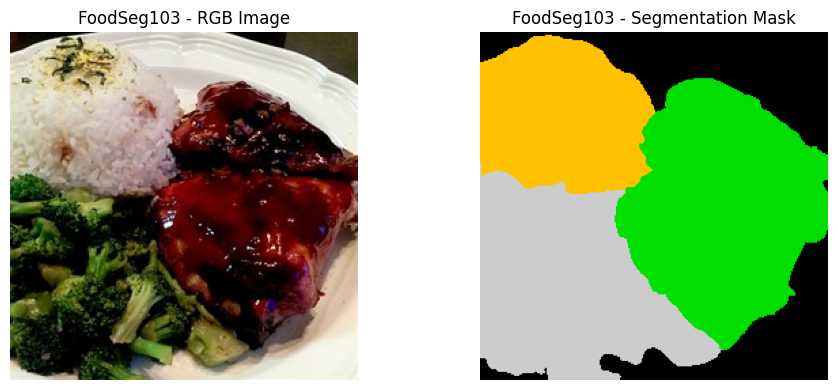

Displayed sample: 00001797.jpg


In [22]:
# Preview a sample image and its segmentation mask from FoodSeg103
import random
from PIL import Image
import matplotlib.pyplot as plt

img_train_dir = BASE_DIR / "foodseg103" / "FoodSeg103" / "Images" / "img_dir" / "train"
ann_train_dir = BASE_DIR / "foodseg103" / "FoodSeg103" / "Images" / "ann_dir" / "train"

sample_image_path = random.choice(list(img_train_dir.glob("*.jpg")))
sample_mask_path = ann_train_dir / (sample_image_path.stem + ".png")

rgb_img = Image.open(sample_image_path).convert("RGB")
mask_img = Image.open(sample_mask_path)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title("FoodSeg103 - RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_img, cmap="nipy_spectral")
plt.title("FoodSeg103 - Segmentation Mask")
plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Displayed sample: {sample_image_path.name}")


In [23]:
# Create a dataset manifest JSON file containing paths to all datasets.
import json

manifest = {
    "FoodSeg103": str(BASE_DIR / "foodseg103" / "FoodSeg103"),
    "Nutrition5k": str(BASE_DIR / "nutrition5k")
}

manifest_dir = BASE_DIR.parent / "manifests"
manifest_dir.mkdir(parents=True, exist_ok=True)
manifest_path = manifest_dir / "datasets_manifest.json"

with open(manifest_path, "w") as f:
    json.dump(manifest, f, indent=4)

print("Dataset manifest created successfully:")
print(json.dumps(manifest, indent=4))


Dataset manifest created successfully:
{
    "FoodSeg103": "/content/drive/MyDrive/Cal_Estimation_Project/data/raw/foodseg103/FoodSeg103",
    "Nutrition5k": "/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k"
}


In [24]:
# Verify that manifest paths are correct and summarize basic dataset statistics.
import json
from pathlib import Path

with open(manifest_path, "r") as f:
    manifest_data = json.load(f)

print("Manifest contents:")
for name, path in manifest_data.items():
    print(f" - {name}: {path}")

foodseg_train = Path(manifest_data["FoodSeg103"]) / "Images" / "img_dir" / "train"
foodseg_count = len(list(foodseg_train.glob('*.*'))) if foodseg_train.exists() else 0

nutrition_files = len(list(Path(manifest_data["Nutrition5k"]).glob('*.*')))

print(f"\nSummary:")
print(f"FoodSeg103 - Training images: {foodseg_count}")
print(f"Nutrition5k - Total files: {nutrition_files}")


Manifest contents:
 - FoodSeg103: /content/drive/MyDrive/Cal_Estimation_Project/data/raw/foodseg103/FoodSeg103
 - Nutrition5k: /content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k

Summary:
FoodSeg103 - Training images: 4983
Nutrition5k - Total files: 6


In [26]:
# Upload USDA FoodData Central CSV manually.
from google.colab import files
import shutil

print("Upload your USDA CSV file (for example: food.csv, nutrient.csv)")
uploaded = files.upload()

usda_dir = BASE_DIR / "usda"
usda_dir.mkdir(parents=True, exist_ok=True)

for filename in uploaded.keys():
    src = Path(filename)
    dst = usda_dir / src.name
    shutil.move(str(src), dst)
    print(f"Moved {filename} to {dst}")


Upload your USDA CSV file (for example: food.csv, nutrient.csv)


Saving acquisition_samples.csv to acquisition_samples.csv
Saving agricultural_samples.csv to agricultural_samples.csv
Saving food_attribute_type.csv to food_attribute_type.csv
Saving food_attribute.csv to food_attribute.csv
Saving food_calorie_conversion_factor.csv to food_calorie_conversion_factor.csv
Saving food_category.csv to food_category.csv
Saving food_component.csv to food_component.csv
Saving food_nutrient_conversion_factor.csv to food_nutrient_conversion_factor.csv
Saving food_nutrient.csv to food_nutrient.csv
Saving food_portion.csv to food_portion.csv
Saving food_protein_conversion_factor.csv to food_protein_conversion_factor.csv
Saving food_update_log_entry.csv to food_update_log_entry.csv
Saving food.csv to food.csv
Saving foundation_food.csv to foundation_food.csv
Saving input_food.csv to input_food.csv
Saving kaggle.json to kaggle.json
Saving lab_method_code.csv to lab_method_code.csv
Saving lab_method_nutrient.csv to lab_method_nutrient.csv
Saving lab_method.csv to lab

In [27]:
# Verify USDA CSV files and preview contents
import pandas as pd

usda_dir = BASE_DIR / "usda"
csv_files = sorted([f.name for f in usda_dir.glob("*.csv")])
print(f"Found {len(csv_files)} USDA CSV files:")
for f in csv_files:
    print(" -", f)

food_csv = usda_dir / "food.csv"
nutrient_csv = usda_dir / "nutrient.csv"

if food_csv.exists():
    df_food = pd.read_csv(food_csv, nrows=5)
    print("\nPreview of food.csv:")
    display(df_food.head())
else:
    print("\nfood.csv not found.")

if nutrient_csv.exists():
    df_nutrient = pd.read_csv(nutrient_csv, nrows=5)
    print("\nPreview of nutrient.csv:")
    display(df_nutrient.head())
else:
    print("\nnutrient.csv not found.")


Found 24 USDA CSV files:
 - acquisition_samples.csv
 - agricultural_samples.csv
 - food.csv
 - food_attribute.csv
 - food_attribute_type.csv
 - food_calorie_conversion_factor.csv
 - food_category.csv
 - food_component.csv
 - food_nutrient.csv
 - food_nutrient_conversion_factor.csv
 - food_portion.csv
 - food_protein_conversion_factor.csv
 - food_update_log_entry.csv
 - foundation_food.csv
 - input_food.csv
 - lab_method.csv
 - lab_method_code.csv
 - lab_method_nutrient.csv
 - market_acquisition.csv
 - measure_unit.csv
 - nutrient.csv
 - sample_food.csv
 - sub_sample_food.csv
 - sub_sample_result.csv

Preview of food.csv:


,fdc_id,data_type,description,food_category_id,publication_date
0,319874,sample_food,"HUMMUS, SABRA CLASSIC",16,2019-04-01
1,319875,market_acquisition,"HUMMUS, SABRA CLASSIC",16,2019-04-01
2,319876,market_acquisition,"HUMMUS, SABRA CLASSIC",16,2019-04-01
3,319877,sub_sample_food,Hummus,16,2019-04-01
4,319878,sub_sample_food,Hummus,16,2019-04-01



Preview of nutrient.csv:


,id,name,unit_name,nutrient_nbr,rank
0,2047,Energy (Atwater General Factors),KCAL,957,280.0
1,2048,Energy (Atwater Specific Factors),KCAL,958,290.0
2,1001,Solids,G,201,200.0
3,1002,Nitrogen,G,202,500.0
4,1003,Protein,G,203,600.0


In [28]:
# Add USDA dataset path to manifest
import json

manifest_path = manifest_dir / "datasets_manifest.json"
with open(manifest_path, "r") as f:
    manifest = json.load(f)

manifest["USDA_FoodData"] = str(usda_dir)

with open(manifest_path, "w") as f:
    json.dump(manifest, f, indent=4)

print("Updated dataset manifest with USDA path:")
print(json.dumps(manifest, indent=4))


Updated dataset manifest with USDA path:
{
    "FoodSeg103": "/content/drive/MyDrive/Cal_Estimation_Project/data/raw/foodseg103/FoodSeg103",
    "Nutrition5k": "/content/drive/MyDrive/Cal_Estimation_Project/data/raw/nutrition5k",
    "USDA_FoodData": "/content/drive/MyDrive/Cal_Estimation_Project/data/raw/usda"
}


In [29]:
# ============================================================
# SAVE CACHE FOR NOTEBOOK 01 (NEW)
# Saves lightweight manifest + dataset paths for fast reuse.
# ============================================================

cache_data = {
    "manifest": manifest,
    "foodseg_path": manifest["FoodSeg103"],
    "nutrition5k_path": manifest["Nutrition5k"],
    "usda_path": manifest["USDA_FoodData"]
}

save_cache(cache_data, "01_cache")


✔ Saved cache → /content/drive/MyDrive/Cal_Estimation_Project/cache/01_cache.pkl
